# WeatherPy
----
#### Analyis
Observed Trends
1.  In the plots summarizing all cities in the data set, it appears that temperature tends to be the highest near the equator, which makes sense. Wind speed appears to be evenly distributed based on latitude which is interesting, I would have predicted there would be more wind in certain areas versus others.
2.  The correlation between temperature and latitude in the northern hemisphere is much stronger than in the southern, but this could be in part because the southern hemisphere has less data points in this sample set. There is still reasonable correlation in the southern hemisphere and it is opposite of northern which makes sense.
3.  There does not appear to be much correlation between latitude and % humidity, cloudiness or windspeed for either hemisphere.


In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import API key
from api_keys import weather_api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# view list of cities
cities

['palpa',
 'punta arenas',
 'petropavlovsk-kamchatskiy',
 'mahebourg',
 'kruisfontein',
 'vaini',
 'nuuk',
 'alofi',
 'bethel',
 'ustka',
 'maceio',
 'illoqqortoormiut',
 'wanning',
 'rikitea',
 'conceicao do araguaia',
 'albany',
 'esperance',
 'mar del plata',
 'touros',
 'youghal',
 'grand river south east',
 'chuy',
 'changji',
 'ponta do sol',
 'anage',
 'souillac',
 'el espinal',
 'kamsack',
 'thompson',
 'leningradskiy',
 'fayaoue',
 'taolanaro',
 'sentyabrskiy',
 'shache',
 'butaritari',
 'barentsburg',
 'lorengau',
 'georgetown',
 'ancud',
 'lasa',
 'ushuaia',
 'novorzhev',
 'sarkikaraagac',
 'mehamn',
 'barrow',
 'jamestown',
 'maridi',
 'cidreira',
 'carutapera',
 'loutra',
 'lompoc',
 'ambilobe',
 'katsuura',
 'uyuni',
 'torbay',
 'saldanha',
 'bluff',
 'ayan',
 'merauke',
 'port moresby',
 'mechanicsville',
 'busselton',
 'cape town',
 'asau',
 'vao',
 'bosaso',
 'diego de almagro',
 'castro',
 'tigil',
 'tuatapere',
 'flinders',
 'arraial do cabo',
 'mataura',
 'paamiut',

In [40]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_updated = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# loop through the list of cities and perform a request for data on each, numbering each city
#
print(f"Beginning Data Retrieval")
print("-------------------------")
for num, city in enumerate(cities, start=1):
    response = requests.get(query_url + city).json()
    try:
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        # updated city list to omit keys that are not found/have no data
        cities_updated.append(city)
        # print each city with log
        print(f"Processing {num}, City: {city}")
    
    except KeyError:
        print("City not found, skipping")
print("-------------------------")    
print(f"Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing 1, City: palpa
Processing 2, City: punta arenas
Processing 3, City: petropavlovsk-kamchatskiy
Processing 4, City: mahebourg
Processing 5, City: kruisfontein
Processing 6, City: vaini
Processing 7, City: nuuk
Processing 8, City: alofi
Processing 9, City: bethel
Processing 10, City: ustka
Processing 11, City: maceio
City not found, skipping
Processing 13, City: wanning
Processing 14, City: rikitea
Processing 15, City: conceicao do araguaia
Processing 16, City: albany
Processing 17, City: esperance
Processing 18, City: mar del plata
Processing 19, City: touros
Processing 20, City: youghal
City not found, skipping
Processing 22, City: chuy
Processing 23, City: changji
Processing 24, City: ponta do sol
Processing 25, City: anage
Processing 26, City: souillac
Processing 27, City: el espinal
Processing 28, City: kamsack
Processing 29, City: thompson
Processing 30, City: leningradskiy
Processing 31, City: fayaoue
City not found, ski

City not found, skipping
City not found, skipping
Processing 269, City: aklavik
Processing 270, City: rio bueno
Processing 271, City: shahrud
Processing 272, City: visegrad
Processing 273, City: turan
Processing 274, City: binzhou
Processing 275, City: coffs harbour
Processing 276, City: murray bridge
Processing 277, City: qaanaaq
Processing 278, City: lavrentiya
Processing 279, City: kulhudhuffushi
Processing 280, City: praia da vitoria
Processing 281, City: akyab
Processing 282, City: guhagar
Processing 283, City: dillon
Processing 284, City: rio gallegos
Processing 285, City: nhulunbuy
Processing 286, City: kaveripattinam
Processing 287, City: camopi
Processing 288, City: porto empedocle
Processing 289, City: bogale
Processing 290, City: sotuta
Processing 291, City: port augusta
Processing 292, City: lumberton
City not found, skipping
City not found, skipping
Processing 295, City: khandyga
Processing 296, City: baruun-urt
Processing 297, City: tankhoy
Processing 298, City: wajima
Pr

Processing 535, City: roma
City not found, skipping
Processing 537, City: richards bay
Processing 538, City: taicheng
Processing 539, City: shreveport
Processing 540, City: blagoyevo
Processing 541, City: hervey bay
Processing 542, City: lewisporte
Processing 543, City: aden
Processing 544, City: jalu
Processing 545, City: los llanos de aridane
Processing 546, City: paulo afonso
Processing 547, City: kasongo-lunda
Processing 548, City: dapaong
Processing 549, City: marsa matruh
Processing 550, City: seoul
Processing 551, City: abu samrah
Processing 552, City: ankazoabo
Processing 553, City: eyl
Processing 554, City: huicungo
Processing 555, City: charters towers
Processing 556, City: madikeri
Processing 557, City: wamba
Processing 558, City: ketchikan
Processing 559, City: ca mau
Processing 560, City: badou
Processing 561, City: lake shore
Processing 562, City: klaebu
Processing 563, City: rafaela
Processing 564, City: coihaique
City not found, skipping
City not found, skipping
Process

In [31]:
# confirm lists are all same length for data frame
print(len(cities_updated),
len(latitude),
len(temperature),
len(humidity),
len(cloudiness),
len(wind_speed))

557 557 557 557 557 557


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# define dictionary with lists created in loop above
weather_dict = {
    "City": cities_updated,
    "Latitude": latitude,
    "Temperature": temperature,
    "% Humidity": humidity,
    "% Cloudiness": cloudiness,
    "Wind Speed (mph)": wind_speed
}

# save dictionary in data frame and show first five rows
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
0,palpa,-14.5336,73.06,63,59,2.53
1,punta arenas,-53.1500,44.71,87,100,8.05
2,petropavlovsk-kamchatskiy,53.0452,37.99,41,75,17.90
3,mahebourg,-20.4081,77.29,73,40,9.22
4,kruisfontein,-34.0033,60.89,91,78,4.29


In [36]:
# define output file (csv)
output_data_file = "../output_data/cities.csv"

# saving the dataframe to csv
weather_df.to_csv(output_data_file)

In [37]:
# view stats on data frame
weather_df.describe()

,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,19.591584,58.773591,70.741472,57.615799,8.538546
std,33.197805,22.413461,20.604828,39.727303,5.615554
min,-54.800000,-8.660000,1.000000,0.000000,0.000000
25%,-8.838900,40.480000,62.000000,15.000000,4.160000
50%,21.516700,64.310000,74.000000,73.000000,7.490000
75%,46.616600,77.290000,86.000000,99.000000,11.300000
max,78.218600,97.880000,100.000000,100.000000,31.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# max humidity is 100% so skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

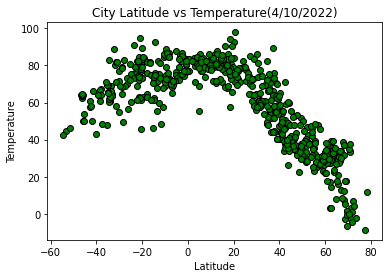

In [120]:
# create a Scatter Plot for latitude vs temp
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Temperature(4/10/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

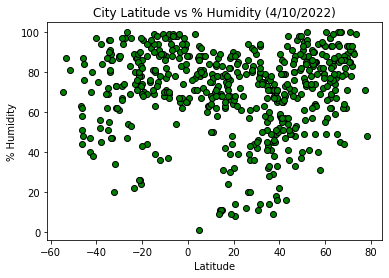

In [122]:
# create a Scatter Plot for latitude vs % humidity
x_values = weather_df['Latitude']
y_values = weather_df['% Humidity']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("City Latitude vs % Humidity (4/10/2022)")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

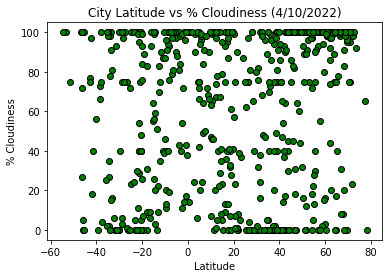

In [123]:
# create a Scatter Plot for latitude vs % cloudiness
x_values = weather_df['Latitude']
y_values = weather_df['% Cloudiness']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("City Latitude vs % Cloudiness (4/10/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

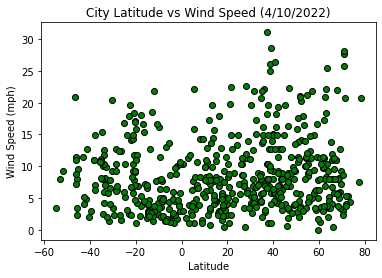

In [124]:
# create a Scatter Plot for latitude vs wind speed
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed (mph)']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (4/10/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvswind.png")
plt.show()

## Linear Regression

In [81]:
#oops, forgot dependecy for stats! here it is
from scipy import stats

# define data frames for north and south hemispheres
north_hem_df = weather_df[weather_df["Latitude"] >= 0]
south_hem_df = weather_df[weather_df["Latitude"] <0]
north_hem_df.head()

,City,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
2,petropavlovsk-kamchatskiy,53.0452,37.99,41,75,17.90
6,nuuk,64.1835,32.61,59,100,9.22
8,bethel,41.3712,40.50,65,14,5.01
9,ustka,54.5805,36.59,83,22,11.30
11,wanning,18.8003,80.53,66,61,5.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8280400741060423


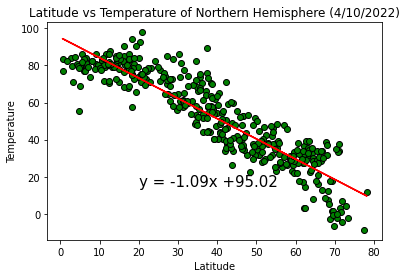

In [125]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Northern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(20,15),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.30104000906522144


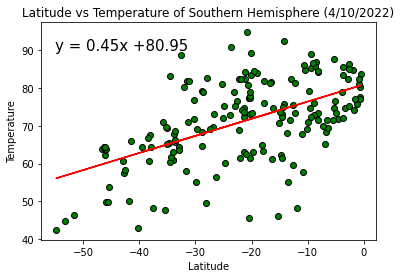

In [126]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Southern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(-55,90),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0457083111936256


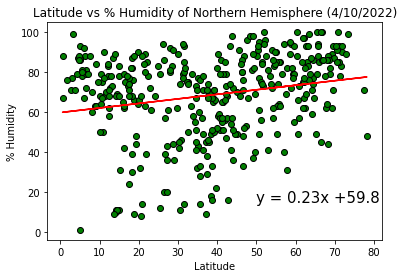

In [127]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Northern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(50,15),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07801087970575846


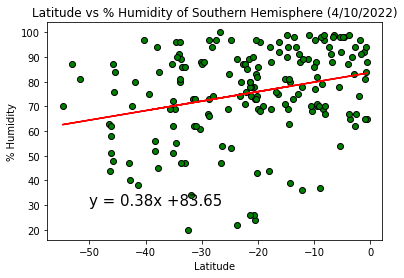

In [128]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Southern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(-50,30),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.027641099121363283


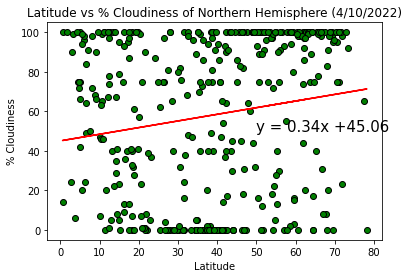

In [129]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Northern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(50,50),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.018802414421507218


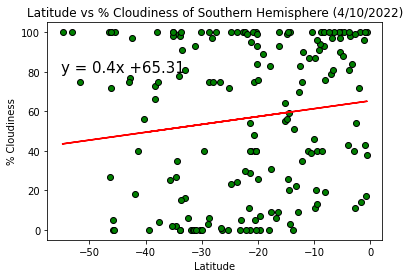

In [130]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Southern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(-55,80),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.019752215908701663


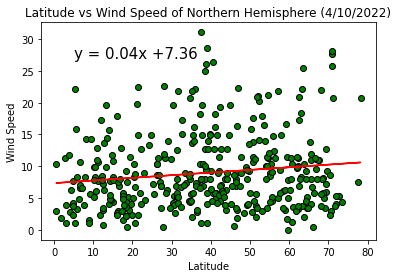

In [131]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Northern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(5,27),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03796996827496379


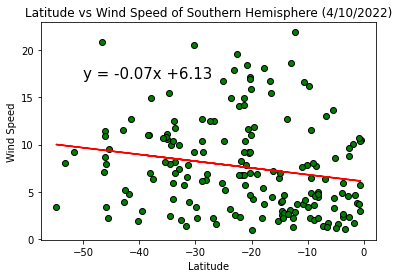

In [132]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Southern Hemisphere (4/10/2022)")
plt.annotate(line_eq,(-50,17),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvswind.png")
plt.show()